# 회사별 로고 예측

In [1]:
# 모듈 로딩
import os
import cv2
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from tensorflow.keras import Sequential
from sklearn.utils import all_estimators
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from urllib.request import urlopen,Request,urlretrieve
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [2]:
# 크롤링 데이터 로테이션시키는 함수
def rota_save(color,foldname):
    # 폴더 만들기
    if not os.path.exists('./'+foldname):
        os.makedirs(foldname)
    
    rotation=[45,90,135,180,225,270,315]
    for file in os.listdir('./data/'):
        for rot in rotation:
            img=np.array(Image.open('./data/'+file).convert(color))
            rows,cols = img.shape[0:2]
            ro_mt = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1.42)
            ro_img = cv2.warpAffine(img, ro_mt,(cols, rows))
            
            # 이미지 저장
            filename=f"{file}_ro{str(rot)}"
            cv2.imwrite('./'+foldname+'/'+filename+'.png',ro_img)

In [3]:
# 크롤링 데이터 convert 함수
def data_con(color,foldname):
    for file in os.listdir('./data/'):
        img=Image.open('./data/'+file).convert(color).save('./'+foldname+'/'+file)

In [4]:
# 흑백으로 로테이션
rota_save('L','blwh')

# rgb로 로테이션
rota_save('RGB','rgb')

In [5]:
# 원본사진 흑백으로
data_con('L','blwh')

# 원본사진 색깔로
data_con('RGB','rgb')

In [6]:
def solution(foldname):
    l=[]
    for i in os.listdir('./'+foldname+'/'):
        n=np.array(Image.open('./'+foldname+'/'+i))/255.0
        if foldname=='blwh':
           n_list=n.reshape(-1,50,50)[0].tolist()
        else:
            n_list=n.reshape(-1,50,50,3)[0].tolist()
        l.append(n_list)
    return np.array(l)

In [7]:
# 동적 웹 크롤링으로 사진저장 함수
def image_save(urlpath,charname):
    driver = webdriver.Chrome('chromedriver.exe') # C:/Users/User/EXAM_PANDAS/DAY-0630/DAY-0920
    #driver = webdriver.Chrome('C:\\workspace’) # Windows 사용자의 설치 경로
    driver.get(urlpath)
    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    driver.quit()

    # 태그-속성 찾기
    image_finds=soup.select("div.bRMDJf img")
    
    # 이미지의 url찾기
    image=[]
    for image_find in image_finds:
        try:
            image.append(image_find['src'])
            image.append(image_find['data-src'])
        except:
            pass
    
    # 폴더 만들기
    if not os.path.exists('./departdata'+charname):
        os.makedirs('./departdata'+charname)
    
    # 파일 저장하기
    for i in range(0,len(image)):
        urlretrieve(image[i],'./departdata'+charname+'/'+charname+str(i)+'.png')

    # 파일 크기 조절
    for png in os.listdir('./departdata'+charname):
        Image.open('./departdata'+charname+'/'+png).resize((50,50)).save('./departdata'+charname+'/'+png)

In [8]:
# 신세계
image_save('https://www.google.com/search?q=%EC%8B%A0%EC%84%B8%EA%B3%84%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwiWx8zJs6L6AhUzNqYKHQVnCpoQ2-cCegQIABAA&oq=%EC%8B%A0%EC%84%B8%EA%B3%84%EB%B0%B1%ED%99%94%EC%A0%80&gs_lcp=CgNpbWcQARgBMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDoECCMQJzoLCAAQgAQQsQMQgwFQ0QVY9w9g9xtoAnAAeAGAAYcBiAGHCpIBBDAuMTCYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=CDApY5ajNLPsmAWFzqnQCQ&bih=744&biw=767','shinsegae')

# 현대
image_save('https://www.google.com/search?q=%ED%98%84%EB%8C%80%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwi0sPHOs6L6AhUGdpQKHRNvCvIQ2-cCegQIABAA&oq=%ED%98%84%EB%8C%80%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgUIABCABDIGCAAQHhAIMgYIABAeEAg6BAgjECdQ1wNYrQtgpA9oAHAAeACAAbwBiAGUCJIBAzAuNpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=EzApY_TaOYbs0QST3qmQDw&bih=744&biw=767', 'hyundai')

# 롯데 
image_save('https://www.google.com/search?q=%EB%A1%AF%EB%8D%B0%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwiQmOv-tKL6AhVSFYgKHY_0CaAQ2-cCegQIABAA&oq=%EB%A1%AF%EB%8D%B0%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgUIABCABDoECCMQJzoGCAAQHhAHOgYIABAeEAhQ-RFYzBdg_RpoAHAAeACAAaABiAHHBpIBAzAuNpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=hDEpY5DGOdKqoASP6aeACg&bih=744&biw=767', 'lotte')

# 대백
image_save('https://www.google.com/search?q=%EB%8C%80%EB%B0%B1+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwiQmOv-tKL6AhVSFYgKHY_0CaAQ2-cCegQIABAA&oq=%EB%8C%80%EB%B0%B1+%EB%A1%9C%EA%B3%A0&gs_lcp=CgNpbWcQAzIFCAAQgAQ6BAgjECc6BggAEB4QBzoGCAAQHhAIOgQIABAYUL4GWJsKYJYPaAFwAHgBgAGdAYgBswaSAQMwLjaYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=hDEpY5DGOdKqoASP6aeACg&bih=744&biw=767', 'debec')

# 갤러리아
image_save('https://www.google.com/search?q=%EA%B0%A4%EB%9F%AC%EB%A6%AC%EC%95%84%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwiQmOv-tKL6AhVSFYgKHY_0CaAQ2-cCegQIABAA&oq=%EA%B0%A4%EB%9F%AC%EB%A6%AC%EC%95%84%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&gs_lcp=CgNpbWcQARgAMgUIABCABDIGCAAQHhAHOgQIIxAnOgYIABAeEAhQsAVY-QxgghxoAnAAeAKAAZoBiAHVCpIBBDAuMTCYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=hDEpY5DGOdKqoASP6aeACg&bih=744&biw=767', 'galleria')

In [9]:
shinimg = Image.open('./departdatashinsegae/shinsegae0.png')
hyundai = Image.open('./departdatahyundai/hyundai0.png')
lotte = Image.open('./departdatalotte/lotte0.png')
debec = Image.open('./departdatadebec/debec0.png')
galleria = Image.open('./departdatagalleria/galleria0.png')

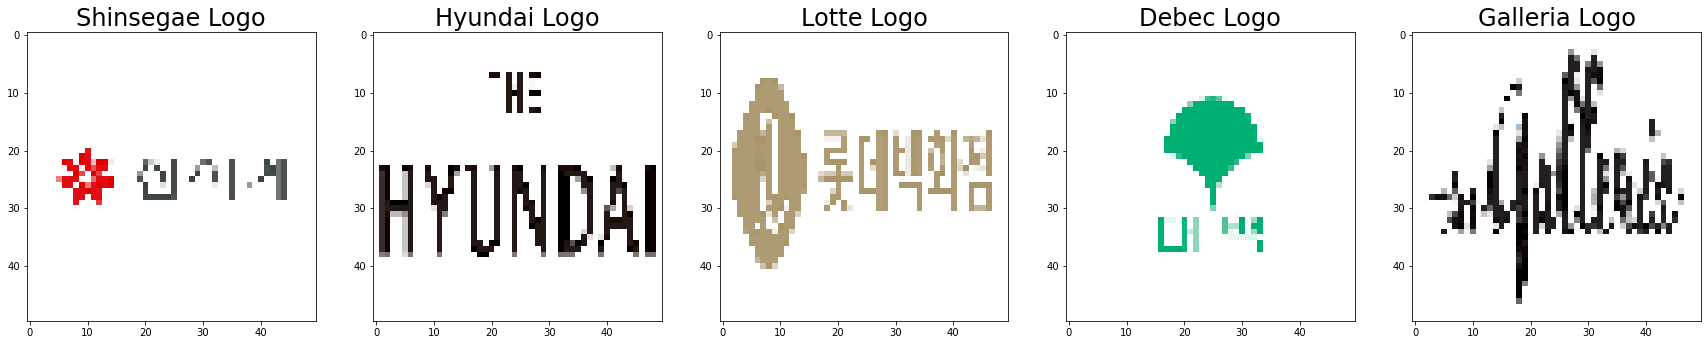

In [10]:
fig=plt.figure(figsize=(30,30))

plt.subplot(1, 5, 1)
plt.imshow(shinimg)
plt.title('Shinsegae Logo', fontsize=24)

plt.subplot(1, 5, 2)
plt.imshow(hyundai)
plt.title('Hyundai Logo', fontsize=24)

plt.subplot(1, 5, 3)
plt.imshow(lotte)
plt.title('Lotte Logo', fontsize=24)

plt.subplot(1, 5, 4)
plt.imshow(debec)
plt.title('Debec Logo', fontsize=24)

plt.subplot(1, 5, 5)
plt.imshow(galleria)
plt.title('Galleria Logo', fontsize=24)
plt.show()

In [11]:
# a = Image.open('./departdatashinsegae/shinsegae'+str(i)+'.png')
# np.array(a).reshape(-1,50*50)[0].tolist()

In [12]:
allshinimg = []
allhyundaiimg = []
alllotteimg = []
alldebecimg = []
allgalleriaimg = []


for i in range(22):
    a = Image.open('./departdatashinsegae/shinsegae'+str(i)+'.png')
    allshinimg.append(np.array(a).reshape(-1,50*50)[0].tolist())
    
for j in range(20):
    b = Image.open('./departdatahyundai/hyundai'+str(j)+'.png')
    allhyundaiimg.append(np.array(b).reshape(-1,50*50)[0].tolist())
    
for o in range(20):
    c = Image.open('./departdatalotte/lotte'+str(o)+'.png')
    alllotteimg.append(np.array(c).reshape(-1,50*50)[0].tolist())
  
for f in range(22):
    d = Image.open('./departdatadebec/debec'+str(f)+'.png')
    alldebecimg.append(np.array(d).reshape(-1,50*50)[0].tolist())
    
for g in range(20):
    e = Image.open('./departdatagalleria/galleria'+str(g)+'.png')
    allgalleriaimg.append(np.array(e).reshape(-1,50*50)[0].tolist())

In [13]:
print('신세계 로고 : ', len(allshinimg))
print('현대 로고 : ', len(allhyundaiimg))
print('롯데 로고 : ', len(alllotteimg))
print('대백 로고 : ', len(alldebecimg))
print('갤러리아 로고 : ', len(allgalleriaimg))

신세계 로고 :  22
현대 로고 :  20
롯데 로고 :  20
대백 로고 :  22
갤러리아 로고 :  20


In [14]:
allimgplus=np.row_stack((allshinimg, allhyundaiimg, alllotteimg, alldebecimg, allgalleriaimg))
allimgplus.shape

(104, 2500)

In [15]:
target1=np.array([0]*22)
target2=np.array([1]*20)
target3=np.array([2]*20)
target4=np.array([3]*22)
target5=np.array([4]*20)

In [16]:
target=np.concatenate([target1, target2, target3, target4, target5])
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [17]:
allimgplus

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [ 41,  37,  25, ..., 254, 131, 254]])

In [18]:
allimgplus=allimgplus/255.0

In [19]:
allimgplus=allimgplus.reshape(-1,50,50,1)

In [20]:
# 훈련/테스트 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(allimgplus, target,
                                                    random_state=42,
                                                    stratify=target)

In [21]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  stratify=y_train,
                                                  random_state=42)

In [23]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(58, 50, 50, 1) (58,)
(26, 50, 50, 1) (26,)
(20, 50, 50, 1) (20,)


# 모델

In [24]:
model=Sequential()
model.add(Conv2D(58, kernel_size=3, activation='relu', padding='same', input_shape=(50,50,1)))
model.add(MaxPool2D())
model.add(Conv2D(200, kernel_size=3, padding='same'))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 58)        580       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 58)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 200)       104600    
                                                                 
 flatten (Flatten)           (None, 125000)            0         
                                                                 
 dense (Dense)               (None, 5)                 625005    
                                                                 
Total params: 730,185
Trainable params: 730,185
Non-trainable params: 0
__________________________________________________

In [26]:
train_datagen = ImageDataGenerator(
    
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True
)
train_datagen.fit(x_train)

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
History = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=32),
                              epochs = 100, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 32)

Epoch 1/100
1/1 [==============================] - 1s 827ms/step - loss: 1.5992 - accuracy: 0.1562 - val_loss: 2.8829 - val_accuracy: 0.2000
Epoch 2/100
1/1 [==============================] - 0s 158ms/step - loss: 3.0513 - accuracy: 0.2308 - val_loss: 2.9530 - val_accuracy: 0.1500
Epoch 3/100
1/1 [==============================] - 0s 169ms/step - loss: 4.1772 - accuracy: 0.3077 - val_loss: 1.7777 - val_accuracy: 0.2000
Epoch 4/100
1/1 [==============================] - 0s 167ms/step - loss: 2.2512 - accuracy: 0.1923 - val_loss: 1.8187 - val_accuracy: 0.2000
Epoch 5/100
1/1 [==============================] - 0s 174ms/step - loss: 1.7137 - accuracy: 0.1250 - val_loss: 2.0651 - val_accuracy: 0.1500
Epoch 6/100
1/1 [==============================] - 0s 182ms/step - loss: 2.0554 - accuracy: 0.3125 - val_loss: 2.1448 - val_accuracy: 0.1500
Epoch 7/100
1/1 [==============================] - 0s 171ms/step - loss: 1.7057 - accuracy: 0.4615 - val_loss: 2.1710 - val_accuracy: 0.1500
Epoch 8/100
1

Epoch 59/100
1/1 [==============================] - 0s 187ms/step - loss: 1.3788 - accuracy: 0.2812 - val_loss: 2.4184 - val_accuracy: 0.2000
Epoch 60/100
1/1 [==============================] - 0s 191ms/step - loss: 1.3726 - accuracy: 0.3125 - val_loss: 2.3842 - val_accuracy: 0.2000
Epoch 61/100
1/1 [==============================] - 0s 168ms/step - loss: 1.2458 - accuracy: 0.5385 - val_loss: 2.3405 - val_accuracy: 0.1500
Epoch 62/100
1/1 [==============================] - 0s 169ms/step - loss: 1.4533 - accuracy: 0.2308 - val_loss: 2.3275 - val_accuracy: 0.1500
Epoch 63/100
1/1 [==============================] - 0s 158ms/step - loss: 1.4279 - accuracy: 0.3846 - val_loss: 2.3182 - val_accuracy: 0.2000
Epoch 64/100
1/1 [==============================] - 0s 184ms/step - loss: 1.3510 - accuracy: 0.4062 - val_loss: 2.3187 - val_accuracy: 0.2000
Epoch 65/100
1/1 [==============================] - 0s 209ms/step - loss: 1.3934 - accuracy: 0.4062 - val_loss: 2.3317 - val_accuracy: 0.1500
Epoch 

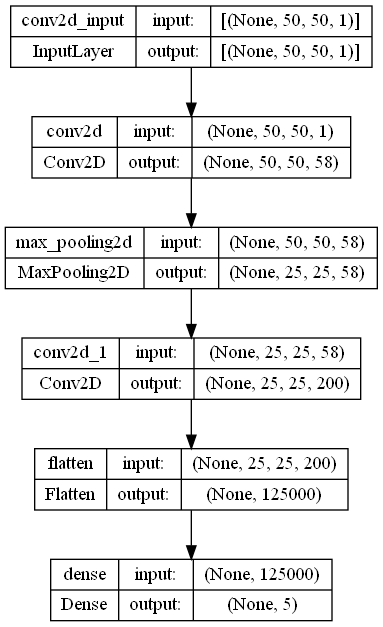

In [29]:
plot_model(model, show_shapes=True)

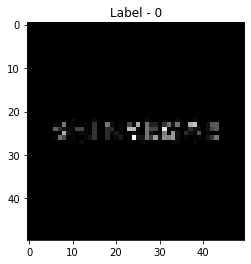

In [30]:
plt.imshow(x_val[3].reshape(50,50), cmap='gray')
plt.title(f'Label - {y_val[3]}')
plt.show()

In [31]:
y_train

array([1, 3, 2, 0, 1, 1, 0, 3, 3, 4, 0, 3, 2, 3, 3, 2, 2, 4, 4, 0, 4, 3,
       0, 3, 1, 1, 0, 2, 4, 0, 4, 3, 0, 0, 3, 0, 4, 2, 2, 4, 2, 4, 1, 1,
       3, 1, 4, 0, 1, 4, 2, 1, 3, 0, 2, 3, 2, 1])

In [32]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 52ms/step - loss: 5.0672 - accuracy: 0.1154


[5.067173480987549, 0.11538461595773697]

In [33]:
pre_y=model.predict(x_test[25].reshape(-1, 50, 50, 1))

1/1 [==============================] - 0s 98ms/step


In [34]:
pre_y.round(2)

array([[0.09, 0.  , 0.18, 0.38, 0.35]], dtype=float32)

In [35]:
y_test[25]

2

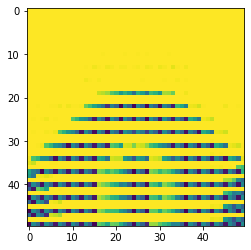

In [36]:
plt.imshow(x_test[25].reshape(50, 50))
plt.show()

## 전체 데이터
---

In [37]:
blwh=solution('blwh')
rgb=solution('rgb')

In [69]:
DIR='./target.csv'
tarDF=pd.read_csv(DIR)
tarDF1=pd.read_csv(DIR)

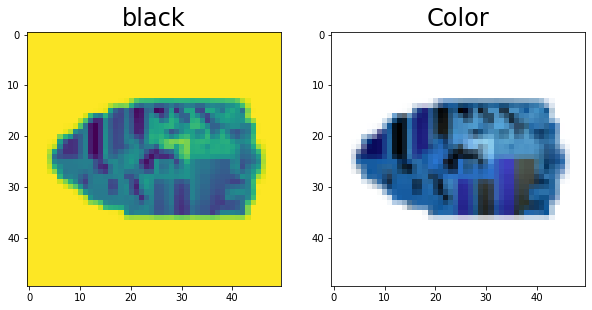

In [39]:
fig=plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(blwh[3500].reshape(50,50,1))
plt.title('black', fontsize=24)

plt.subplot(1, 2, 2)
plt.imshow(rgb[3500].reshape(50,50,3))
plt.title('Color', fontsize=24)
plt.show()

In [40]:
data=rgb
target=tarDF=np.array(tarDF.label)

In [41]:
data.shape, target.shape

((4312, 50, 50, 3), (4312,))

In [42]:
# 훈련/테스트 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(data, target,
                                                    random_state=42,
                                                    stratify=target)

In [43]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  stratify=y_train,
                                                  random_state=42)

In [44]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(2425, 50, 50, 3) (2425,)
(1078, 50, 50, 3) (1078,)
(809, 50, 50, 3) (809,)


### 모델

In [45]:
model=Sequential()
model.add(Conv2D(58, kernel_size=3, activation='relu', padding='same', input_shape=(50,50,3)))
model.add(MaxPool2D())
model.add(Conv2D(100, kernel_size=3, padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 58)        1624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 58)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 100)       52300     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 100)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_1 (Dense)             (None, 100)              

In [47]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
    
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True
)
train_datagen.fit(x_train)

In [48]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
History1 = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=32),
                              epochs = 100, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 32)

Epoch 1/100
75/75 [==============================] - 8s 108ms/step - loss: 2.7466 - accuracy: 0.1964 - val_loss: 2.2430 - val_accuracy: 0.3684
Epoch 2/100
75/75 [==============================] - 8s 100ms/step - loss: 1.9762 - accuracy: 0.4271 - val_loss: 1.8385 - val_accuracy: 0.4697
Epoch 3/100
75/75 [==============================] - 8s 100ms/step - loss: 1.7157 - accuracy: 0.4964 - val_loss: 1.6672 - val_accuracy: 0.5192
Epoch 4/100
75/75 [==============================] - 8s 101ms/step - loss: 1.4871 - accuracy: 0.5524 - val_loss: 1.5577 - val_accuracy: 0.5241
Epoch 5/100
75/75 [==============================] - 8s 101ms/step - loss: 1.3607 - accuracy: 0.5930 - val_loss: 1.2865 - val_accuracy: 0.6180
Epoch 6/100
75/75 [==============================] - 8s 100ms/step - loss: 1.2425 - accuracy: 0.6239 - val_loss: 1.2537 - val_accuracy: 0.6378
Epoch 7/100
75/75 [==============================] - 8s 101ms/step - loss: 1.1110 - accuracy: 0.6532 - val_loss: 1.1561 - val_accuracy: 0.6625

Epoch 58/100
75/75 [==============================] - 8s 110ms/step - loss: 0.2797 - accuracy: 0.9202 - val_loss: 0.7897 - val_accuracy: 0.8430
Epoch 59/100
75/75 [==============================] - 8s 110ms/step - loss: 0.2000 - accuracy: 0.9306 - val_loss: 0.8389 - val_accuracy: 0.8603
Epoch 60/100
75/75 [==============================] - 8s 110ms/step - loss: 0.2008 - accuracy: 0.9331 - val_loss: 0.8429 - val_accuracy: 0.8529
Epoch 61/100
75/75 [==============================] - 8s 110ms/step - loss: 0.2181 - accuracy: 0.9285 - val_loss: 0.7674 - val_accuracy: 0.8480
Epoch 62/100
75/75 [==============================] - 8s 111ms/step - loss: 0.2238 - accuracy: 0.9244 - val_loss: 0.8293 - val_accuracy: 0.8492
Epoch 63/100
75/75 [==============================] - 8s 109ms/step - loss: 0.2218 - accuracy: 0.9281 - val_loss: 0.9047 - val_accuracy: 0.8010
Epoch 64/100
75/75 [==============================] - 8s 110ms/step - loss: 0.2162 - accuracy: 0.9273 - val_loss: 0.7911 - val_accuracy:

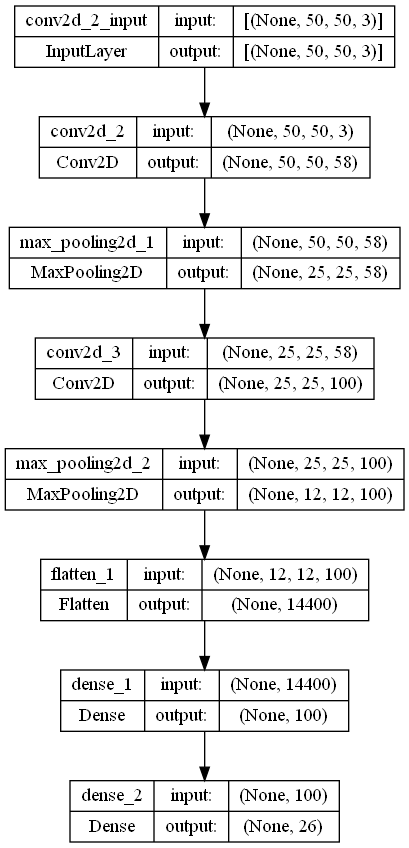

In [50]:
plot_model(model, show_shapes=True)

In [104]:
y_val.shape

(809,)

In [98]:
df = pd.DataFrame(tarDF1.name.unique())
df['label'] = tarDF1.label.unique()
df.columns = ['Brand', 'Label']
df

,Brand,Label
0,angelinus,0
1,banolim,1
2,bbackdabang,2
3,benz,3
4,bmw,4
5,crown,5
6,cw,6
7,debec,7
8,domino,8
9,ediya,9


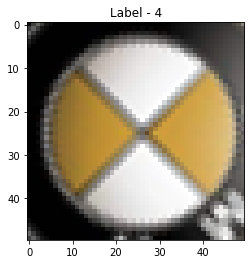

In [51]:
plt.imshow(x_val[100].reshape(50,50,3))
plt.title(f'Label - {y_val[100]}')
plt.show()

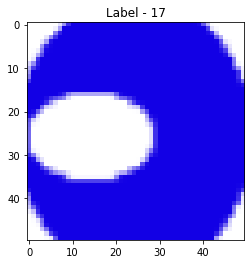

In [63]:
plt.imshow(x_val[150].reshape(50,50,3))
plt.title(f'Label - {y_val[150]}')
plt.show()

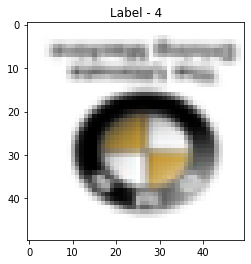

In [103]:
plt.imshow(x_val[800].reshape(50,50,3))
plt.title(f'Label - {y_val[800]}')
plt.show()